## Prepare data for Bayesian Analysis

The goal is to discretize all continuous value variables and catgorical variables into less than 5 catgories to reduce the number of nodes. 

Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset

In [2]:
listings = pd.read_csv('listings_b.csv', index_col=False)

In [3]:
listings.head()

,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,cancellation_policy,calculated_host_listings_count,electronics and entertainment,balcony,breakfast,elevator,child_friendly,parking,long_term_stays,self_check_in
0,0,Kensington and Chelsea,Apartment,Entire home/apt,2,1.0,1.0,1.0,100,150,...,strict,1,1,0,0,0,0,0,1,0
1,0,Westminster,Apartment,Entire home/apt,6,2.0,3.0,3.0,300,350,...,strict,15,1,0,0,1,1,1,1,1
2,0,Hammersmith and Fulham,Other,Private room,2,1.0,1.0,1.0,150,0,...,strict,2,1,0,1,0,1,0,0,0
3,1,Wandsworth,Apartment,Entire home/apt,4,1.0,2.0,2.0,65,350,...,moderate,1,1,0,0,1,0,1,0,0
4,0,Hounslow,House,Private room,2,1.0,1.0,1.0,100,0,...,flexible,2,0,0,0,0,0,1,0,1


Columns 

In [4]:
print(listings.columns.to_list())

['host_is_superhost', 'neighbourhood', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'minimum_nights', 'number_of_reviews_ltm', 'review_scores_rating', 'cancellation_policy', 'calculated_host_listings_count', 'electronics and entertainment', 'balcony', 'breakfast', 'elevator', 'child_friendly', 'parking', 'long_term_stays', 'self_check_in']


Drop the index column

In [5]:
listings.drop(listings.columns[listings.columns.str.contains('Unnamed', case=False)],axis=1, inplace=True)

Create a function for count plot

In [6]:
def count_plot(column):
    plt.figure(figsize=(8,4))
    listings[column].value_counts().plot(kind='bar', color=['crimson', 'darkcyan', 'darkslategray', 'darkorchid', 'dimgrey', 'olivedrab', 'orange', 'red', 'deepskyblue','salmon', 'dodgerblue', 'mediumvioletred'])
    plt.title(column)
    plt.xticks(rotation=0)
    plt.show()

Create a function to bin numerical columns into catgorical variables. 

In [7]:
def bin_column(column, bins, labels, na_label='Unknown'):
    listings[column] = pd.cut(listings[column], bins=bins, labels=labels, include_lowest=True)
    listings[column] = listings[column].astype('str')
    listings[column].replace('nan', na_label, inplace=True)

As neighbourhood column has 33 different values, let's categorise neighbourhood into 3 different categories based on median price. 

Calculate the median price for each neighbourhood. 

In [8]:
neighbourhood_medianprice = listings.groupby('neighbourhood', as_index=False).price.median()

In [9]:
neighbourhood_medianprice

,neighbourhood,price
0,Barking and Dagenham,45
1,Barnet,57
2,Bexley,40
3,Brent,65
4,Bromley,50
5,Camden,109
6,City of London,150
7,Croydon,45
8,Ealing,55
9,Enfield,50


Add th median price to the main dataset

In [10]:
listings = pd.merge(listings, neighbourhood_medianprice, on=["neighbourhood", "neighbourhood"], how="inner")

Columns

In [11]:
print(listings.columns.to_list())

['host_is_superhost', 'neighbourhood', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price_x', 'security_deposit', 'cleaning_fee', 'guests_included', 'minimum_nights', 'number_of_reviews_ltm', 'review_scores_rating', 'cancellation_policy', 'calculated_host_listings_count', 'electronics and entertainment', 'balcony', 'breakfast', 'elevator', 'child_friendly', 'parking', 'long_term_stays', 'self_check_in', 'price_y']


Rename the price columns

In [12]:
listings.rename(columns = {"price_y": "neighbourhood_mp"}, inplace=True)

In [13]:
listings.rename(columns = {"price_x": "price"}, inplace=True)

Count of different median price

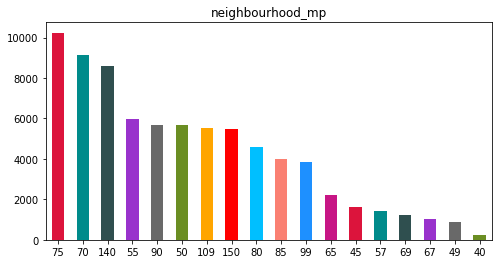

In [14]:
count_plot('neighbourhood_mp')

Bin median price into 3 categories

In [15]:
bin_column('neighbourhood_mp', bins=[0,50,75,100,140,151], labels=['0to50', '50to75', '75to100','100to140','140to150'],na_label='none')

Drop the column neighbourhood. 

In [16]:
listings.drop('neighbourhood', axis=1, inplace=True)

Count of accomodates

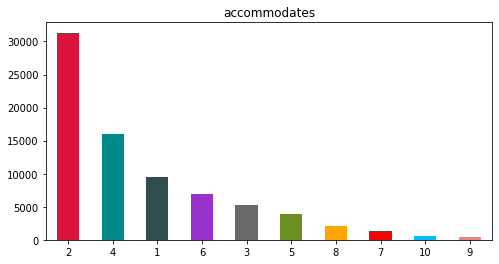

In [17]:
count_plot('accommodates')

Bin accommodates into different categories

In [18]:
bin_column('accommodates', bins=[0,1,2,3,4,28], labels=['1_person', '2_people', '3_people', '4_people', 'more_than_4'],na_label='none')

Count plot for bathrooms

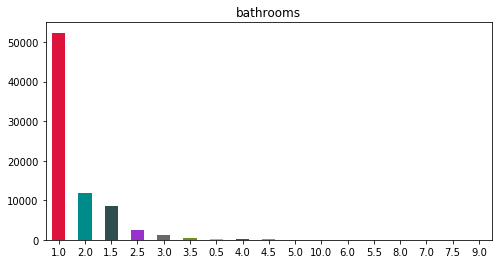

In [19]:
count_plot('bathrooms')

Bin the bathrooms

In [20]:
bin_column('bathrooms', bins=[0,1,1.5,2,2.5,18], labels=['1_bathroom', '1.5_bathrooms', '2_bathrooms', '2.5_bathrooms', 'more_than_2.5_bathrooms'],na_label='none')

Bedrooms

In [21]:
#Bin the bedrooms
bin_column('bedrooms', bins=[0,1,2,3,4,25], labels=['1_bedroom', '2_bedrooms', '3_bedrooms', '4_bedrooms', 'more_than_4_bedrooms'],na_label='none')

Beds

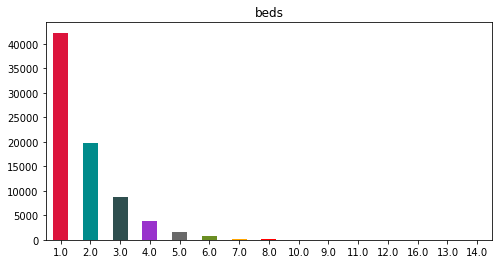

In [22]:
count_plot('beds')

In [23]:
#Bin the beds
bin_column('beds', bins=[0,1,2,3,4,29], labels=['1_bed', '2_beds', '3_beds', '4_beds', 'more_than_4_beds'],na_label='none')

Price

Distribution of price

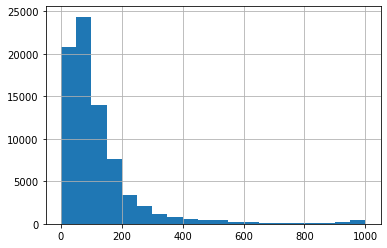

In [24]:
listings.price.hist(bins=20, range=(0,1000))

In [25]:
bin_column('price', bins=[0,50,100,150,200,400,1001], labels=['0to50', '50to100', '100to150', '150to200', '200to400','400above'],na_label='none')

Guests Included

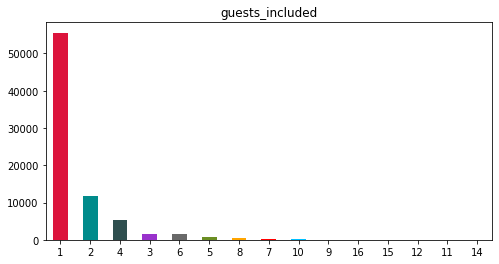

In [26]:
count_plot('guests_included')

In [27]:
bin_column('guests_included', bins=[0,1,2,50], labels=['1_guest', '2_guests', 'more_than_2_guests'],na_label='none')

Minimum Nights

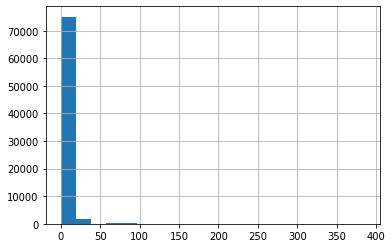

In [28]:
listings.minimum_nights.hist(bins=20, range=(0,386))

In [29]:
bin_column('minimum_nights', bins=[0,1,2,4,91], labels=['1_night', '2_nights', '3-4_nights', 'more_than_4_nights'],na_label='none')

Number of reviews in last twelve months

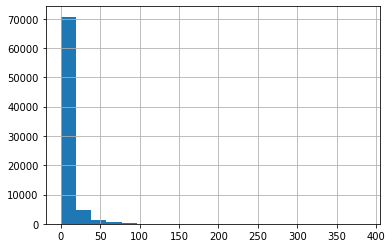

In [30]:
listings.number_of_reviews_ltm.hist(bins=20, range=(0,386))

In [31]:
bin_column('number_of_reviews_ltm', bins=[-1,0,5,20,50,400], labels=['0', '1to5', '5to20', '20to50', '50_above'],na_label='none')

host_is_superhost

Replace 0 and 1 with 'yes' and 'no'

In [32]:
listings.host_is_superhost.replace({1:'yes', 0:'no'}, inplace=True)

Drop the columns which won't be used as they are not important and to reduce the number of nodes

In [33]:
columns_to_drop=['cleaning_fee','security_deposit', 'cancellation_policy','calculated_host_listings_count','electronics and entertainment', 'balcony', 'breakfast', 'elevator', 'child_friendly', 'parking', 
                 'long_term_stays', 'self_check_in']

In [34]:
listings.drop(columns_to_drop, axis=1, inplace=True)

Check distinct values for each variable

In [35]:
for i in listings.columns.to_list():
    print(listings[i].value_counts())

no     65630
yes    11712
Name: host_is_superhost, dtype: int64
Apartment    55407
House        20059
Other         1876
Name: property_type, dtype: int64
Entire home/apt    42805
Private room       33422
Shared room          567
Hotel room           548
Name: room_type, dtype: int64
2_people       31325
4_people       16005
more_than_4    15327
1_person        9424
3_people        5261
Name: accommodates, dtype: int64
1_bathroom                 52583
2_bathrooms                11752
1.5_bathrooms               8501
2.5_bathrooms               2354
more_than_2.5_bathrooms     2152
Name: bathrooms, dtype: int64
1_bedroom               51517
2_bedrooms              17365
3_bedrooms               5818
4_bedrooms               2078
more_than_4_bedrooms      564
Name: bedrooms, dtype: int64
1_bed               42253
2_beds              19795
3_beds               8758
4_beds               3917
more_than_4_beds     2619
Name: beds, dtype: int64
50to100     24306
0to50       23600
100to150    

Save the data in a csv

In [36]:
listings.to_csv(r'listings_pb.csv', index=False, header=True)